In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    

import traceback

from LSTM_for_Stock.model import SequentialModel
from LSTM_for_Stock.data_processor import DataHelper
from LSTM_for_Stock.data_processor import DataLoaderStock
import logging
from LSTM_for_Stock.data_processor import Wrapper
from LSTM_for_Stock.data_processor import Wrapper_fillna
from LSTM_for_Stock.unit import PlotHelper
import numpy as np

Using TensorFlow backend.


In [2]:
class Wrapper_123(Wrapper):
    def build(self, df):
        result = df.copy()
        result = result.fillna(method='ffill')
        return result.drop(columns=['up_count', 'down_count']).dropna()


In [3]:
dl = DataLoaderStock('601398',wrapper=Wrapper_123())
df = dl.load()
window = 10
days = 3
X_train, Y_train, X_test, Y_test = DataHelper.train_test_split(
    df, window=window, days=days)

In [4]:
X_train_arr = []
Y_train_arr = []
for x in X_train:
    X_train_arr.append(x.values)
for y in Y_train:
    Y_train_arr.append(y.values)
X_test_arr = []
Y_test_arr = []
for x in X_test:
    X_test_arr.append(x.values)
for y in Y_test:
    Y_test_arr.append(y.values)

In [5]:
X_train[0]

,open_bench,high_bench,low_bench,close_bench,volume_bench,amount_bench,open,high,low,close,volume,amount
date,,,,,,,,,,,,
2006-10-27,1455.98,1460.45,1433.35,1439.05,373793.0,2.149619e+10,1.992133,2.015570,1.910104,1.921823,4.407654e+07,8.725310e+09
2006-10-30,1436.66,1446.24,1428.33,1446.24,353204.0,1.987446e+10,1.915963,1.945260,1.904245,1.927682,6.006282e+06,1.153128e+09
2006-10-31,1447.06,1464.48,1447.06,1464.47,369522.0,2.146362e+10,1.921823,1.951119,1.921823,1.933541,3.927594e+06,7.610508e+08
2006-11-01,1465.67,1479.41,1461.32,1479.41,389269.0,2.351843e+10,1.933541,1.939400,1.921823,1.933541,2.268092e+06,4.372648e+08
2006-11-02,1480.55,1480.55,1464.60,1479.66,423731.0,2.475796e+10,1.933541,1.933541,1.904245,1.921823,2.989400e+06,5.733994e+08
2006-11-03,1481.58,1497.47,1480.77,1488.29,393720.0,2.331928e+10,1.915963,1.974556,1.915963,1.968696,6.827127e+06,1.331710e+09
2006-11-06,1477.44,1507.97,1472.00,1507.89,420335.0,2.522168e+10,1.951119,1.980415,1.945260,1.980415,3.583992e+06,7.062480e+08
2006-11-07,1512.65,1516.80,1491.33,1516.10,430383.0,2.789455e+10,1.980415,2.009711,1.974556,1.992133,5.065395e+06,1.010942e+09
2006-11-08,1512.36,1513.04,1497.01,1498.17,287224.0,1.914031e+10,1.992133,1.992133,1.962837,1.968696,2.591178e+06,5.122505e+08


In [6]:
layers = [{
    'units': 100,
    'type': 'lstm',
    'input_shape': X_train_arr[0].shape
}, {
    'units': days,
    'type': 'dense'
}]
complie = {'loss': 'mse', 'optimizer': 'adam', 'metrics': ['mae', 'acc']}

model = SequentialModel()
model.build_model(layers, complie)
history = model.train(
    np.array(X_train_arr),
    np.array(Y_train_arr),
    train={
        'epochs': 500,
        'verbose': 2,
        'validation_split': 0.15
    })
# logging.info(history)
# logging.info(model.evaluate(np.array(X_test_arr), np.array(Y_test_arr)))
# logging.info(model.predict(np.array(X_test_arr)))

Train on 2145 samples, validate on 379 samples
Epoch 1/500
 - 1s - loss: 7.3896 - mean_absolute_error: 2.6318 - acc: 0.4242 - val_loss: 8.6012 - val_mean_absolute_error: 2.9159 - val_acc: 0.4142
Epoch 2/500
 - 0s - loss: 2.9620 - mean_absolute_error: 1.5955 - acc: 0.4242 - val_loss: 4.1556 - val_mean_absolute_error: 2.0175 - val_acc: 0.4142
Epoch 3/500
 - 0s - loss: 1.0988 - mean_absolute_error: 0.8673 - acc: 0.4242 - val_loss: 2.0898 - val_mean_absolute_error: 1.4220 - val_acc: 0.4142
Epoch 4/500
 - 0s - loss: 0.5063 - mean_absolute_error: 0.4933 - acc: 0.4242 - val_loss: 1.2543 - val_mean_absolute_error: 1.0957 - val_acc: 0.4142
Epoch 5/500
 - 0s - loss: 0.3540 - mean_absolute_error: 0.3866 - acc: 0.3347 - val_loss: 0.9277 - val_mean_absolute_error: 0.9383 - val_acc: 0.2586
Epoch 6/500
 - 0s - loss: 0.3238 - mean_absolute_error: 0.3845 - acc: 0.3161 - val_loss: 0.8044 - val_mean_absolute_error: 0.8713 - val_acc: 0.2586
Epoch 7/500
 - 0s - loss: 0.3179 - mean_absolute_error: 0.3970 - 

Epoch 56/500
 - 0s - loss: 0.2985 - mean_absolute_error: 0.3691 - acc: 0.3287 - val_loss: 0.8306 - val_mean_absolute_error: 0.8866 - val_acc: 0.3377
Epoch 57/500
 - 0s - loss: 0.2982 - mean_absolute_error: 0.3744 - acc: 0.2942 - val_loss: 0.9671 - val_mean_absolute_error: 0.9604 - val_acc: 0.2480
Epoch 00057: early stopping


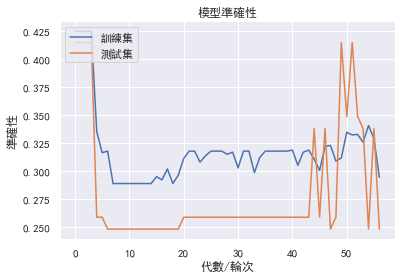

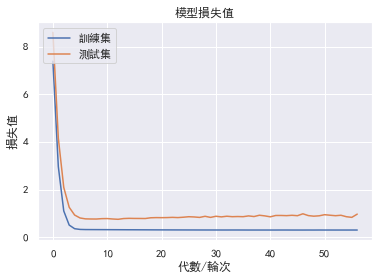

In [7]:
PlotHelper.plot_history(history)

In [8]:
score=model.evaluate(np.array(X_test_arr), np.array(Y_test_arr))

446/446 [==============================] - ETA:  - 0s 65us/step


In [9]:
for i in range(len(model.model.metrics_names)):
    print('{0}:{1}'.format(model.model.metrics_names[i], score[i]))

loss:5.851317963792604
mean_absolute_error:2.363536822956239
acc:0.24215246643453436


In [10]:
model.predict(np.array(X_test_arr))

array([[2.9767032, 2.980096 , 2.9772468],
       [2.9767032, 2.980096 , 2.9772468],
       [2.9767032, 2.980096 , 2.9772468],
       ...,
       [3.224403 , 3.2265098, 3.2220292],
       [3.2244034, 3.2265093, 3.2220297],
       [3.2244034, 3.2265093, 3.2220297]], dtype=float32)

In [11]:
X_test[0]

,open_bench,high_bench,low_bench,close_bench,volume_bench,amount_bench,open,high,low,close,volume,amount
date,,,,,,,,,,,,
2017-03-15,3452.21,3463.92,3445.27,3463.64,791049.0,9.405626e+10,4.353318,4.353318,4.307590,4.344172,6.380373e+05,276534272.0
2017-03-16,3472.27,3492.13,3472.27,3481.51,1063339.0,1.246956e+11,4.335026,4.344172,4.289298,4.298444,1.293051e+06,559053120.0
2017-03-17,3485.31,3488.50,3441.47,3445.81,1037555.0,1.223689e+11,4.307590,4.316735,4.271007,4.289298,8.881284e+05,381978592.0
2017-03-20,3449.05,3454.06,3429.83,3449.61,887343.0,1.037694e+11,4.298444,4.325881,4.289298,4.307590,9.138872e+05,393812192.0
2017-03-21,3449.77,3466.70,3445.64,3466.35,877078.0,1.135282e+11,4.298444,4.316735,4.289298,4.307590,6.244658e+05,268888800.0
2017-03-22,3450.75,3464.33,3433.50,3450.05,1049359.0,1.238656e+11,4.307590,4.307590,4.252716,4.261861,1.235083e+06,528460224.0
2017-03-23,3452.41,3470.82,3435.69,3461.98,943180.0,1.158138e+11,4.271007,4.289298,4.252716,4.271007,9.747863e+05,416701728.0
2017-03-24,3464.20,3499.32,3461.11,3489.60,1256458.0,1.417525e+11,4.271007,4.289298,4.234425,4.289298,1.060404e+06,452381984.0
2017-03-27,3488.76,3505.98,3474.52,3478.04,1070153.0,1.243880e+11,4.271007,4.353318,4.261861,4.344172,1.722503e+06,743929152.0


In [12]:
X_test_arr[0]

array([[3.45221000e+03, 3.46392000e+03, 3.44527000e+03, 3.46364000e+03,
        7.91049000e+05, 9.40562596e+10, 4.35331770e+00, 4.35331770e+00,
        4.30758958e+00, 4.34417208e+00, 6.38037283e+05, 2.76534272e+08],
       [3.47227000e+03, 3.49213000e+03, 3.47227000e+03, 3.48151000e+03,
        1.06333900e+06, 1.24695577e+11, 4.33502645e+00, 4.34417208e+00,
        4.28929833e+00, 4.29844395e+00, 1.29305099e+06, 5.59053120e+08],
       [3.48531000e+03, 3.48850000e+03, 3.44147000e+03, 3.44581000e+03,
        1.03755500e+06, 1.22368918e+11, 4.30758958e+00, 4.31673520e+00,
        4.27100707e+00, 4.28929833e+00, 8.88128435e+05, 3.81978592e+08],
       [3.44905000e+03, 3.45406000e+03, 3.42983000e+03, 3.44961000e+03,
        8.87343000e+05, 1.03769407e+11, 4.29844395e+00, 4.32588083e+00,
        4.28929833e+00, 4.30758958e+00, 9.13887198e+05, 3.93812192e+08],
       [3.44977000e+03, 3.46670000e+03, 3.44564000e+03, 3.46635000e+03,
        8.77078000e+05, 1.13528201e+11, 4.29844395e+00, 4.31

In [13]:
Y_test[0]

date
2017-03-29    4.371609
2017-03-30    4.399046
2017-03-31    4.426483
Name: close, dtype: float64

In [14]:
Y_test_arr[0]

array([4.37160895, 4.39904583, 4.42648271])